In [5]:
%%bash
set -eo pipefail
cd data
wget https://cf.10xgenomics.com/samples/cell-exp/7.0.0/5k_mouse_heart_CNIK_3pv3/5k_mouse_heart_CNIK_3pv3_filtered_feature_bc_matrix.tar.gz


--2024-05-27 15:39:06--  https://cf.10xgenomics.com/samples/cell-exp/7.0.0/5k_mouse_heart_CNIK_3pv3/5k_mouse_heart_CNIK_3pv3_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: 27216493 (26M) [application/x-tar]
Saving to: ‘5k_mouse_heart_CNIK_3pv3_filtered_feature_bc_matrix.tar.gz’

     0K .......... .......... .......... .......... ..........  0% 80.6M 0s
    50K .......... .......... .......... .......... ..........  0% 8.65M 2s
   100K .......... .......... .......... .......... ..........  0% 14.7M 2s
   150K .......... .......... .......... .......... ..........  0%  105M 1s
   200K .......... .......... .......... .......... ..........  0% 71.5M 1s
   250K .......... .......... .......... .......... ..........  1% 22.6M 1s
   300K .......... .......... .......... .......... ..........  1%  126M 1s
   350K .......... .......... .......... .......... ..........  1% 88.8M 1s
   400K .......... .......... .......... .......... ..........  1%  128M 1s
   450K .......... .......... .......... .......... ..........  1%  128M 1s
   500K .......... .......... .......... .......... ..........  2%  109M 1s
 

In [8]:
%%bash
cd data
tar xf 5k_mouse_heart_CNIK_3pv3_filtered_feature_bc_matrix.tar.gz

In [9]:

%%bash
set -eo pipefail
cd data
dictys_helper expression_mtx.py filtered_feature_bc_matrix expression.tsv.gz

In [12]:
%%bash
printf '%-10s%20s%20s%20s\n' '' $(cat data/expression.tsv.gz | gunzip | head -n 20 | awk -F "\t" '{print $1"\t"$2"\t"$3"\t"$4}')

            AAACCCACAATAAGGT-1  AAACCCACAGGGACTA-1  AAACCCACATTGTCGA-1
0610005C13Rik                   0                   0                   0
0610006L08Rik                   0                   0                   0
0610009B22Rik                   0                   0                   0
0610009E02Rik                   0                   0                   0
0610009L18Rik                   0                   0                   0
0610010F05Rik                   0                   0                   0
0610010K14Rik                   0                   1                   0
0610012D04Rik                   0                   0                   0
0610012G03Rik                   0                   0                   0
0610025J13Rik                   0                   0                   0
0610030E20Rik                   2                   1                   0
0610031O16Rik                   0                   0                   0
0610033M10Rik                   0        

In [16]:
%%bash
set -eo pipefail
cd data

In [17]:
%%bash
ls -h1s data/bams | head

total 12G
 2.6M AAACCCACAATAAGGT-1.bam
 7.4M AAACCCACAGGGACTA-1.bam
 4.7M AAACCCACATTGTCGA-1.bam
  12M AAACGAACACGACGAA-1.bam
 2.7M AAACGAAGTCCAGCGT-1.bam
 240K AAACGAAGTGCTATTG-1.bam
 3.8M AAACGAATCATCACAG-1.bam
 4.2M AAACGAATCGTGCGAC-1.bam
 352K AAACGCTAGAAGGTAG-1.bam


In [19]:
%%bash
cd data
subsets="$(tail -n +2 clusters.csv | awk -F , '{print $2}' | sort -u)"
echo "$subsets" | awk '{print "Subset"$1}' > subsets.txt
for x in $subsets; do
	mkdir -p "subsets/Subset$x"
	grep ",$x"'$' clusters.csv | awk -F , '{print $1}' > "subsets/Subset$x/names_rna.txt"
	# RNA and ATAC barcodes are the same for joint quantifications
	cp "subsets/Subset$x/names_rna.txt" "subsets/Subset$x/names_atac.txt"
done

In [20]:
!head data/subsets.txt

Subset1
Subset10
Subset2
Subset3
Subset4
Subset5
Subset6
Subset7
Subset8
Subset9


In [22]:
!head -n 4 data/subsets/Subset1/names_rna.txt

AAACCCACAGGGACTA-1
AAACCCACATTGTCGA-1
AAACGAAGTCCAGCGT-1
AAACGAATCGTGCGAC-1


In [23]:
!head -n 4 data/subsets/Subset1/names_atac.txt

AAACCCACAGGGACTA-1
AAACCCACATTGTCGA-1
AAACGAAGTCCAGCGT-1
AAACGAATCGTGCGAC-1


In [1]:
!head -n 18 data/motifs.motif

>dKhGCGTGh	Ahr_mouse.h11mo.0.b	3.3193649999999995
0.262728374765856	0.1227600511842322	0.362725638699551	0.25178593535036087
0.07633328991810645	0.08258130543118362	0.22593295481662123	0.6151524498340887
0.14450570038747923	0.28392173880411337	0.13815442099009081	0.4334181398183167
0.023935814057894068	0.016203821748029118	0.9253278681170539	0.03453249607702277
0.007919544273173793	0.953597675415874	0.017308392078009837	0.021174388232942286
0.02956192959210962	0.012890110758086997	0.9474192747166682	0.010128684933135217
0.007919544273173797	0.029561929592109615	0.012337825593096645	0.9501807005416201
0.007919544273173793	0.007919544273173793	0.9762413671804787	0.007919544273173793
0.27886589130660366	0.4285328543459993	0.10955683916661985	0.18304441518077724
>hnnGGWWnddWWGGdbWh	Aire_mouse.h11mo.0.c	5.55011
0.38551919443239085	0.2604245534178759	0.1353299124033618	0.21872633974637148
0.18745267949274294	0.18745267949274294	0.14575446582123766	0.4793401751932764
0.14575446582123777	0.145

In [2]:
%%bash
dictys_helper genome_homer.sh hg38 data/genome

In [3]:
%%bash
ls -h1s data/genome | head

total 4.4G
4.0K annotations
 12K chrom.sizes
3.1G genome.fa
3.2M hg38.aug
 42M hg38.basic.annotation
673M hg38.full.annotation
164K hg38.miRNA
505M hg38.repeats
 24M hg38.rna


In [4]:
%%bash
cd data
gunzip gene.gtf.gz

In [5]:
%%bash
dictys_helper gene_gtf.sh data/gene.gtf data/gene.bed

In [6]:

!head data/gene.bed

chr1	3143476	3144545	4933401J01Rik	.	+
chr1	3172239	3172348	Gm26206	.	+
chr1	3276124	3741721	Xkr4	.	-
chr1	3322980	3323459	Gm18956	.	+
chr1	3435954	3438772	Gm37180	.	-
chr1	3445779	3448011	Gm37363	.	-
chr1	3535200	3537508	Gm37686	.	-
chr1	3536810	3583776	Gm1992	.	+
chr1	3582674	3584730	Gm37329	.	-
chr1	3602018	3602943	Gm7341	.	+


## Makefile preparation

In [7]:
%%bash
mkdir makefiles
cd makefiles
dictys_helper makefile_template.sh common.mk config.mk env_none.mk static.mk

In [8]:
!dictys_helper makefile_update.py makefiles/config.mk '{"ENVMODE": "none", "NTH": "4", "DEVICE": "cuda:0", "GENOME_MACS2": "hs", "JOINT": "0"}'


In [9]:
!cat makefiles/config.mk

# Lingfei Wang, 2022. All rights reserved.
#This file contains parameters for whole run and individual steps to be edited for your dataset
#This file should be edited to configure the run
#This file should NOT be directly used for any run with `makefile -f` 

############################################################
# Run environment settings
############################################################
#Which environment to use, corresponding to env_$(ENVMODE).mk file
ENVMODE=none
#Maximum number of CPU threads for each job
#This is only nominated and passed through to other softwares without any guarantee.
NTH=4
#Device name for pyro/pytorch
#Note: cuda devices other than cuda:0 could be incompatible with singularity environment
DEVICE=cuda:0

############################################################
# Dataset settings
############################################################

#Genome size for Macs2, accept shortcuts like mm & hs
GENOME_MACS2=hs
#Whether dataset is joint prof

In [10]:
!dictys_helper makefile_check.py

Joint profile: False
Found 3282 cells with RNA profile
Found 32123 genes with RNA profile
Found 3282 cells with ATAC profile
Found 529 motifs
Found 451 TFs
here is nameg_motif:
{'Nr5a2', 'Myb', 'Tyy1', 'Hey2', 'Foxo3', 'Bhe41', 'Mbd2', 'Foxo4', 'Foxm1', 'Fosl1', 'Wt1', 'P73', 'Foxf1', 'Relb', 'Dmrtb', 'Rora', 'Creb1', 'E2f5', 'Snai2', 'Sp7', 'Egr4', 'Atf3', 'E2f6', 'Otx1', 'Atoh1', 'Sox18', 'Ap2d', 'Cebpe', 'Nr1i3', 'Lhx6', 'Nr1d1', 'Sta5b', 'Etv5', 'Nkx22', 'Nf2l2', 'Nfac4', 'Elf3', 'Hesx1', 'Pebb', 'Hnf1a', 'Rel', 'Runx2', 'Cebpb', 'Pax8', 'Otx2', 'Stat1', 'Max', 'Gata1', 'Nr6a1', 'Cdx1', 'Foxq1', 'Hxc6', 'Six4', 'Zep1', 'Snai1', 'Zbt18', 'Hxa7', 'Ctcf', 'Nr2c2', 'Gfi1', 'Klf5', 'Xbp1', 'Cebpg', 'Srbp2', 'Hxd10', 'Pit1', 'E2f2', 'Foxf2', 'Nfya', 'Elf2', 'Etv4', 'Nfe2', 'Po2f1', 'Tal1', 'Egr3', 'Tbx21', 'Dmrt1', 'Tgif1', 'Klf6', 'Zep2', 'Hic1', 'Meis2', 'Sox10', 'E4f1', 'Nfil3', 'Pitx1', 'Gli3', 'Myod1', 'Suh', 'Ovol1', 'Isl1', 'Itf2', 'Nfib', 'Po6f1', 'Sp1', 'Gata3', 'Nr1h4', 'Prd16'

In [ ]:
#nohup make -f makefiles/static.mk -j 32 -k cpu || true
#nohup make -f makefiles/static.mk -j 32 -k cpu > nohup3.out 2>&1 &

In [2]:
!make -f makefiles/static.mk combine

makefiles/common.mk:41: WARNING: Temporary folder (/tmp) available space >100GB recommended.
mkdir -p output/
OPENBLAS_NUM_THREADS=1 NUMEXPR_NUM_THREADS=1 MKL_NUM_THREADS=1 OPENBLAS_MAX_THREADS=1 NUMEXPR_MAX_THREADS=1 MKL_MAX_THREADS=1 python3 -m dictys  network tofile  data tmp_static data/subsets.txt output/static.h5


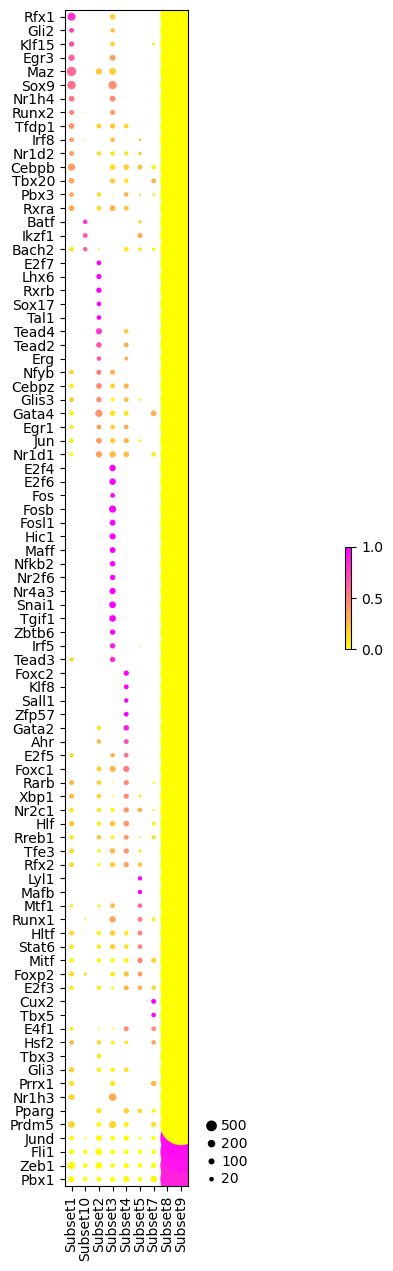

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import dictys
from dictys.net import network
d0=network.from_file('output/static.h5')

from dictys.plot.static import compute_spec
from dictys.plot import dotplot

#Color map of specificity
cmap='spring_r'
#Node sizes to draw legend in dot plot
node_size_deg=[20,100,200,500]
#Transformation from target count to node size
node_size_map_deg=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Find marker genes based on regulatory activity specificity
#Arguments control how many top markers to show and the cutoffs for target count, its specificity at the most abundant cell subset, and its entropy over all cell subsets
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
#Draw dot plot with regulatory activity and its specificity
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)


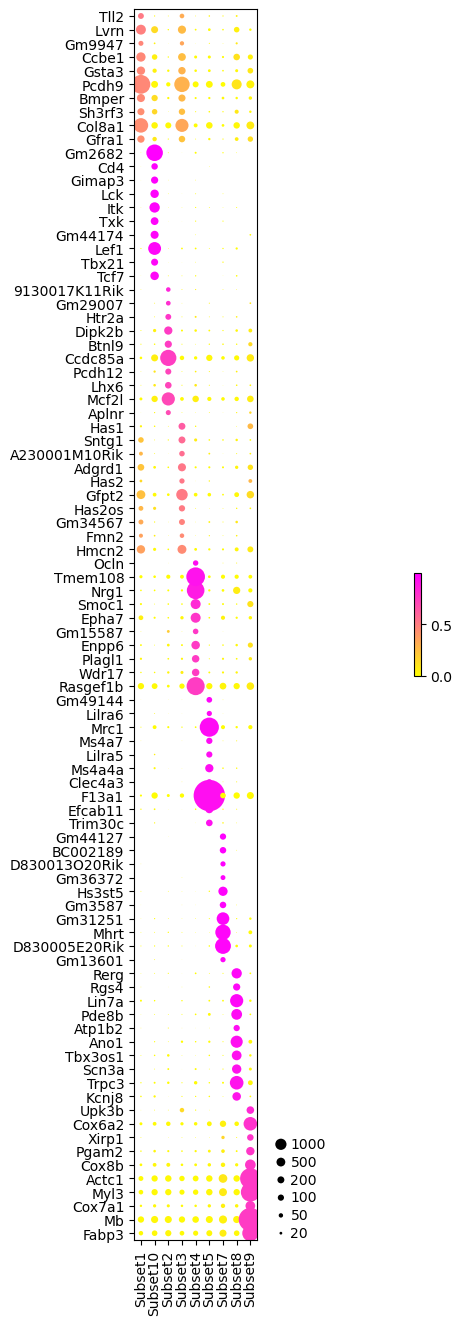

In [17]:
#Expression markers based on gene expression (by CPM) and its specificity
#Node sizes to draw legend in dot plot
node_size_cpm=[20,50,100,200,500,1000]
#Transformation from CPM to node size
node_size_map_cpm=lambda x:x/5*(x<=100)+(20+(x-100)*500/10/990)*(x>100)
#Find marker genes based on expression specificity through the option base='cpm'
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
#Draw dot plot with expression and its specificity
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)

In [18]:
d0.rename('s',{
	'Subset1':'fibroblasts',
 	'Subset10':'Macrophages',
	'Subset2':'Endothelial cells',
 	'Subset3':'immune cells',
  	'Subset4':'progenitor cells',
  	'Subset5':'cardiac fibroblasts',
	'Subset7':'T-cells',
 	'Subset8':'cardiomyocytes',
  	'Subset9':'neuronal cells'})

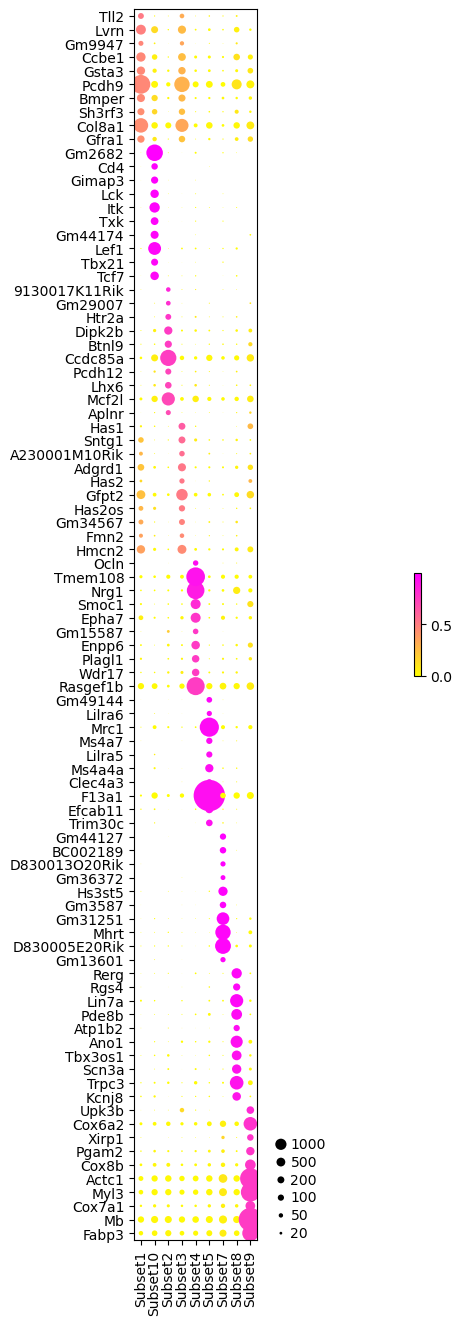

In [25]:
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)

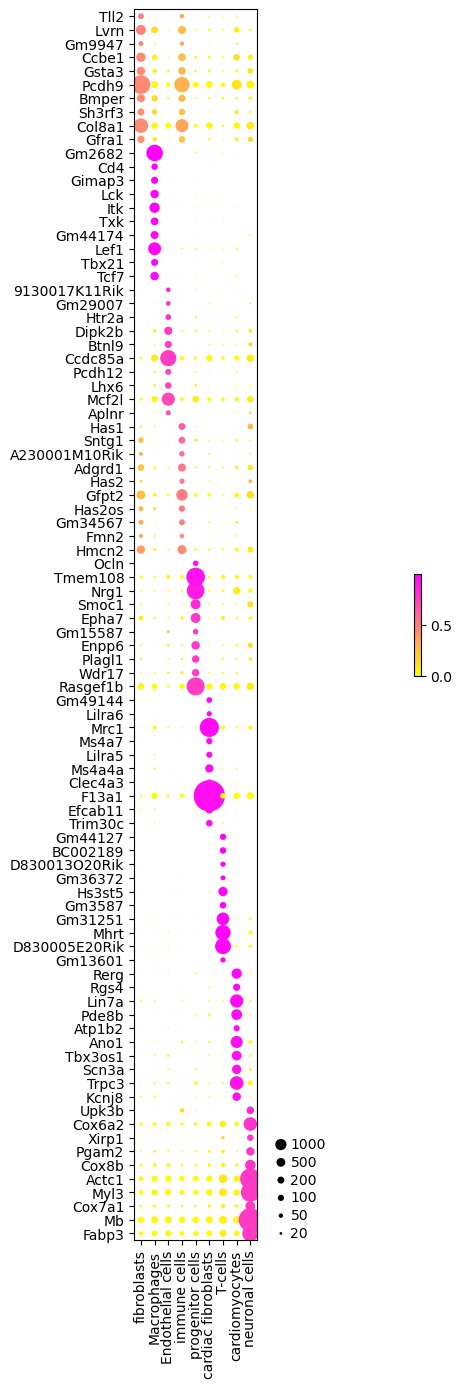

In [27]:
#Redraw of expression marker plot
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)

In [20]:
deg.head()

,Subset1,Subset10,Subset2,Subset3,Subset4,Subset5,Subset7,Subset8,Subset9
Ahr,0,0,14,0,31,0,0,0,8579
Arnt,93,3,52,28,59,40,51,6,8579
Atf1,17,28,77,43,63,5,45,0,8579
Atf2,64,0,32,40,14,4,15,9,8579
Atf4,6,0,6,22,23,6,8,0,8579


In [21]:
deg_spec.head()

,Subset1,Subset10,Subset2,Subset3,Subset4,Subset5,Subset7,Subset8,Subset9
Ahr,0.000000,0.000000,0.283256,0.000000,0.716744,0.000000,0.000000,0.000000,0.0
Arnt,0.161506,0.052552,0.109237,0.038951,0.141634,0.245420,0.180376,0.070324,0.0
Atf1,0.027269,0.453041,0.149406,0.055251,0.139692,0.028336,0.147005,0.000000,0.0
Atf2,0.246604,0.000000,0.149152,0.123462,0.074569,0.054453,0.117710,0.234050,0.0
Atf4,0.059901,0.000000,0.072459,0.175938,0.317412,0.211631,0.162658,0.000000,0.0


In [22]:
cpm_spec.head()

,Subset1,Subset10,Subset2,Subset3,Subset4,Subset5,Subset7,Subset8,Subset9
0610009E02Rik,0.134313,0.066023,0.063642,0.213503,0.091713,0.086521,0.140028,0.118476,0.085781
0610030E20Rik,0.107921,0.181230,0.095352,0.112788,0.089249,0.127710,0.054392,0.138061,0.093297
0610043K17Rik,0.175138,0.102577,0.150964,0.181164,0.067495,0.056710,0.049159,0.166814,0.049977
1110002L01Rik,0.087943,0.240534,0.089751,0.098434,0.120829,0.080074,0.110130,0.172304,0.000000
1110004F10Rik,0.113751,0.092592,0.102582,0.131283,0.119080,0.097209,0.057677,0.121782,0.164045


In [23]:
list(zip(regmarker,regmarker_state))

[('Rfx1', 'Subset1'),
 ('Gli2', 'Subset1'),
 ('Klf15', 'Subset1'),
 ('Egr3', 'Subset1'),
 ('Maz', 'Subset1'),
 ('Sox9', 'Subset1'),
 ('Nr1h4', 'Subset1'),
 ('Runx2', 'Subset1'),
 ('Tfdp1', 'Subset1'),
 ('Irf8', 'Subset1'),
 ('Nr1d2', 'Subset1'),
 ('Cebpb', 'Subset1'),
 ('Tbx20', 'Subset1'),
 ('Pbx3', 'Subset1'),
 ('Rxra', 'Subset1'),
 ('Batf', 'Subset10'),
 ('Ikzf1', 'Subset10'),
 ('Bach2', 'Subset10'),
 ('E2f7', 'Subset2'),
 ('Lhx6', 'Subset2'),
 ('Rxrb', 'Subset2'),
 ('Sox17', 'Subset2'),
 ('Tal1', 'Subset2'),
 ('Tead4', 'Subset2'),
 ('Tead2', 'Subset2'),
 ('Erg', 'Subset2'),
 ('Nfyb', 'Subset2'),
 ('Cebpz', 'Subset2'),
 ('Glis3', 'Subset2'),
 ('Gata4', 'Subset2'),
 ('Egr1', 'Subset2'),
 ('Jun', 'Subset2'),
 ('Nr1d1', 'Subset2'),
 ('E2f4', 'Subset3'),
 ('E2f6', 'Subset3'),
 ('Fos', 'Subset3'),
 ('Fosb', 'Subset3'),
 ('Fosl1', 'Subset3'),
 ('Hic1', 'Subset3'),
 ('Maff', 'Subset3'),
 ('Nfkb2', 'Subset3'),
 ('Nr2f6', 'Subset3'),
 ('Nr4a3', 'Subset3'),
 ('Snai1', 'Subset3'),
 ('Tgif1', '

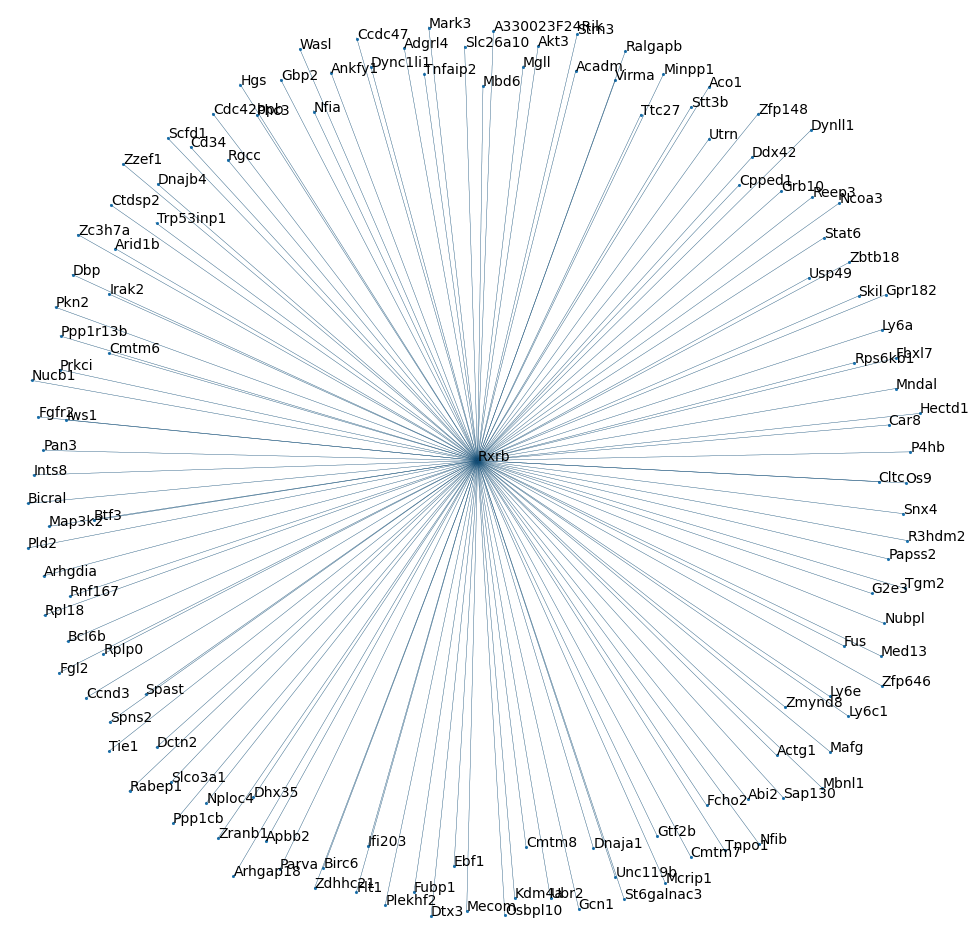

In [24]:
from dictys.plot.static import fig_subnet
import os
os.environ['KMP_AFFINITY'] = ''
import numpy as np
from dictys.net import network
import matplotlib.pyplot as plt

from dictys.plot.static import fig_subnet
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Endothelial cells',regulators=['Rxrb'],annotate='all')

In [32]:
[print(i) for i in nodes.index]

A330023F24Rik
Abi2
Acadm
Aco1
Actg1
Adgrl4
Akt3
Ankfy1
Apbb2
Arhgap18
Arhgdia
Arid1b
Bcl6b
Bicral
Birc6
Btf3
Car8
Ccdc47
Ccnd3
Cd34
Cdc42bpb
Cltc
Cmtm6
Cmtm7
Cmtm8
Cpped1
Ctdsp2
Dbp
Dctn2
Ddx42
Dhx35
Dnaja1
Dnajb4
Dtx3
Dync1li1
Dynll1
Ebf1
Fbxl7
Fcho2
Fgfr2
Fgl2
Flt1
Fubp1
Fus
G2e3
Gbp2
Gcn1
Gpr182
Grb10
Gtf2b
Hectd1
Hgs
Ifi203
Ints8
Irak2
Iws1
Kdm4a
Ly6a
Ly6c1
Ly6e
Mafg
Map3k2
Mark3
Mbd6
Mbnl1
Mcrip1
Mecom
Med13
Mgll
Minpp1
Mndal
Ncoa3
Nfia
Nfib
Nploc4
Nubpl
Nucb1
Os9
Osbpl10
P4hb
Pan3
Papss2
Parva
Phc3
Pkn2
Pld2
Plekhf2
Ppp1cb
Ppp1r13b
Prkci
R3hdm2
Rabep1
Ralgapb
Reep3
Rgcc
Rnf167
Rpl18
Rplp0
Rps6kb1
Rxrb
Sap130
Scfd1
Skil
Slc26a10
Slco3a1
Snx4
Spast
Spns2
St6galnac3
Stat6
Strn3
Stt3b
Tgm2
Tie1
Tnfaip2
Tnpo1
Trp53inp1
Ttc27
Ubr2
Unc119b
Usp49
Utrn
Virma
Wasl
Zbtb18
Zc3h7a
Zdhhc21
Zfp148
Zfp646
Zmynd8
Zranb1
Zzef1


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
from dictys.plot.static import compute_spec
from dictys.plot import dotplot
node_size_map_deg=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)
node_size_deg=[20,100,200,500]
cmap='spring_r'
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
#fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)

list(zip(regmarker,regmarker_state))

[('Rfx1', 'Subset1'),
 ('Gli2', 'Subset1'),
 ('Klf15', 'Subset1'),
 ('Egr3', 'Subset1'),
 ('Maz', 'Subset1'),
 ('Sox9', 'Subset1'),
 ('Nr1h4', 'Subset1'),
 ('Runx2', 'Subset1'),
 ('Tfdp1', 'Subset1'),
 ('Irf8', 'Subset1'),
 ('Nr1d2', 'Subset1'),
 ('Cebpb', 'Subset1'),
 ('Tbx20', 'Subset1'),
 ('Pbx3', 'Subset1'),
 ('Rxra', 'Subset1'),
 ('Batf', 'Subset10'),
 ('Ikzf1', 'Subset10'),
 ('Bach2', 'Subset10'),
 ('E2f7', 'Subset2'),
 ('Lhx6', 'Subset2'),
 ('Rxrb', 'Subset2'),
 ('Sox17', 'Subset2'),
 ('Tal1', 'Subset2'),
 ('Tead4', 'Subset2'),
 ('Tead2', 'Subset2'),
 ('Erg', 'Subset2'),
 ('Nfyb', 'Subset2'),
 ('Cebpz', 'Subset2'),
 ('Glis3', 'Subset2'),
 ('Gata4', 'Subset2'),
 ('Egr1', 'Subset2'),
 ('Jun', 'Subset2'),
 ('Nr1d1', 'Subset2'),
 ('E2f4', 'Subset3'),
 ('E2f6', 'Subset3'),
 ('Fos', 'Subset3'),
 ('Fosb', 'Subset3'),
 ('Fosl1', 'Subset3'),
 ('Hic1', 'Subset3'),
 ('Maff', 'Subset3'),
 ('Nfkb2', 'Subset3'),
 ('Nr2f6', 'Subset3'),
 ('Nr4a3', 'Subset3'),
 ('Snai1', 'Subset3'),
 ('Tgif1', '